In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

# Plotting the composition of data

## Static composition

### Pie chart

In [ ]:
p = sns.load_dataset("penguins")
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
c = p.groupby('species')['species'].count()

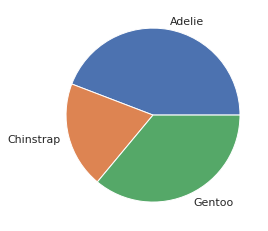

In [ ]:
plt.pie(c, labels=c.index);
plt.show()

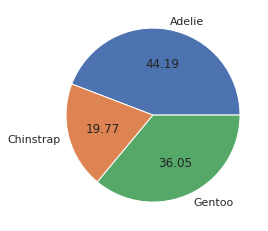

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f");
plt.show()

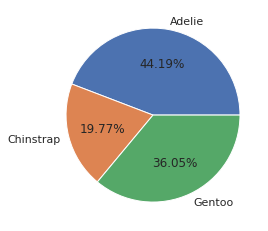

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.show()

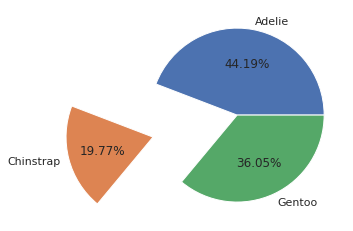

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0]);
plt.show()

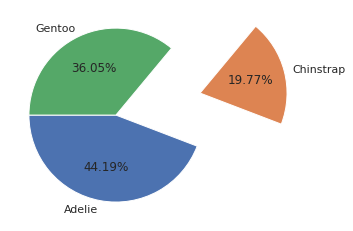

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180);
plt.show()

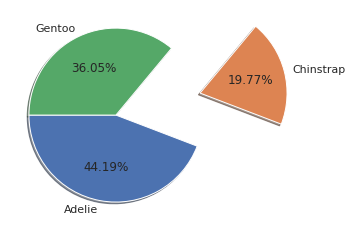

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180, shadow=True);
plt.show()

### Donut chart

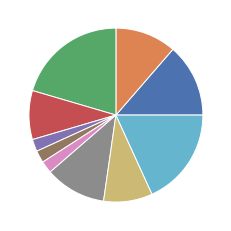

In [ ]:
plt.pie(np.random.randint(1, 10, 10))
plt.show()

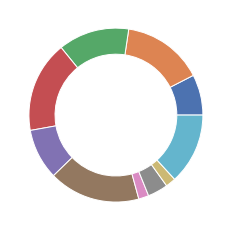

In [ ]:
plt.pie(np.random.randint(1, 10, 10), wedgeprops=dict(width=0.3))
plt.show()

In [ ]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

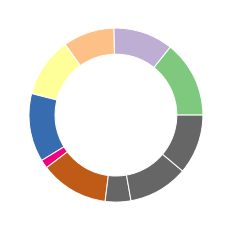

In [ ]:
plt.pie(np.random.randint(1, 10, 10), wedgeprops=dict(width=0.3),
        colors=my_colours)
plt.show()

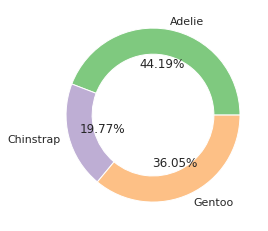

In [ ]:
plt.pie(c, labels=c.index, autopct="%.2f%%", wedgeprops=dict(width=0.3),
        colors=my_colours);
plt.show()

In [ ]:
c_i = p.groupby('island')['island'].count()

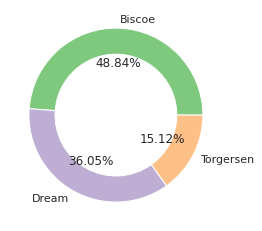

In [ ]:
plt.pie(c_i, labels=c_i.index, autopct="%.2f%%", wedgeprops=dict(width=0.3),
        colors=my_colours);
plt.show()

In [ ]:
pd.crosstab(p.island, p.species) 

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


In [ ]:
c = pd.crosstab(p.island, p.species) 

In [ ]:
c.sum(axis=1)

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [ ]:
c.sum(axis=0)

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

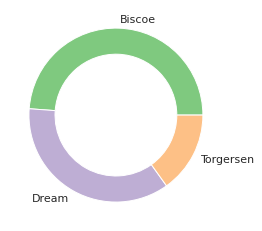

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3),
        colors=my_colours);
plt.show()

In [ ]:
c.values.flatten()

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

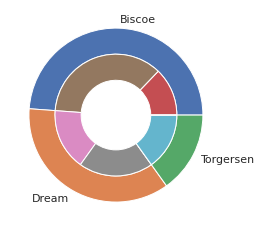

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3));
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3));

In [ ]:
cmap = plt.get_cmap('tab20c')
outer_colour = cmap(np.array([0, 4, 8]))
inner_colour = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

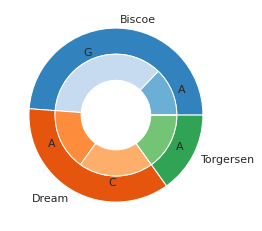

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3),
        colors=outer_colour);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colour);

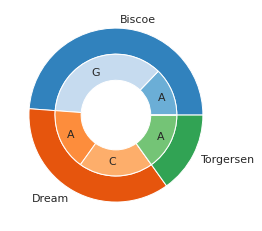

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3),
        colors=outer_colour);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colour,
        labeldistance=0.75);

In [ ]:
cmap = plt.get_cmap('tab20b')
outer_colour = cmap(np.array([0, 4, 8]))
inner_colour = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

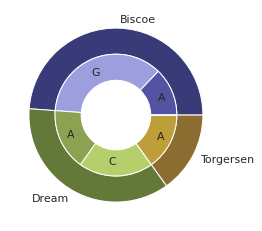

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3),
        colors=outer_colour);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colour,
        labeldistance=0.75);

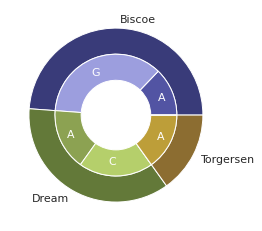

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=1, wedgeprops=dict(width=0.3),
        colors=outer_colour);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colour,
        labeldistance=0.75, textprops=dict(color='w'));

### Stacked Bar plots

In [4]:
import urllib.request

url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json');

In [5]:
# Load json as dictionary
import json

with open('data.json') as f:
  data = json.load(f)

data = data['states_daily']
df = pd.json_normalize(data)

In [10]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [12]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.drop('dateymd', axis=1, inplace=True)
df_.set_index('status', inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_.head()

status,Confirmed,Recovered,Deceased
an,9,10,0
ap,625,1186,5
ar,31,53,1
as,163,122,0
br,713,668,5


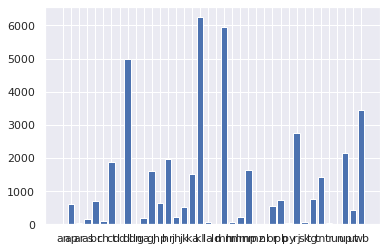

In [14]:
plt.bar(df_.index, df_.Confirmed);

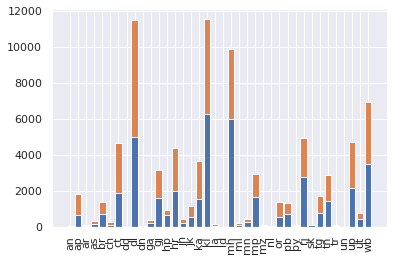

In [15]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

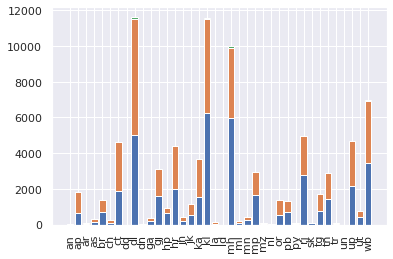

In [16]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

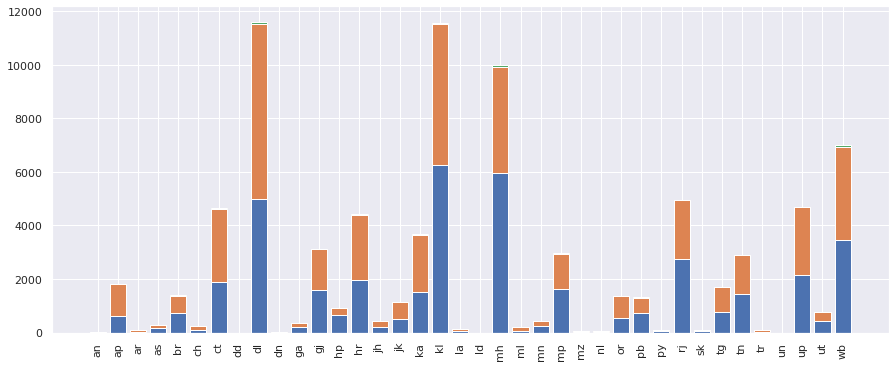

In [17]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

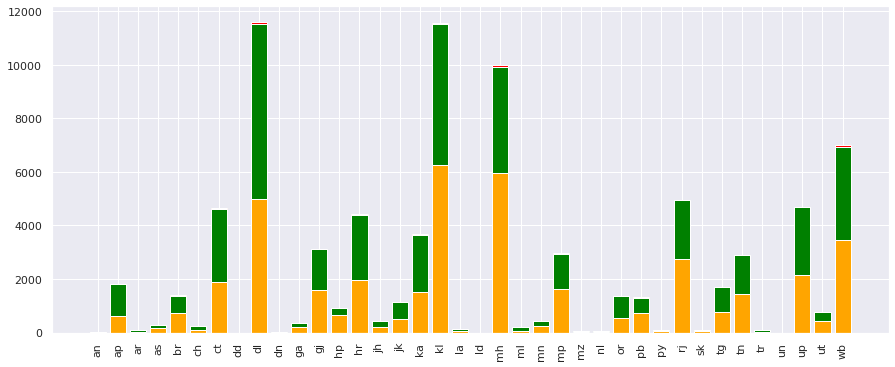

In [18]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.Confirmed, color='orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='red');
plt.xticks(rotation=90);

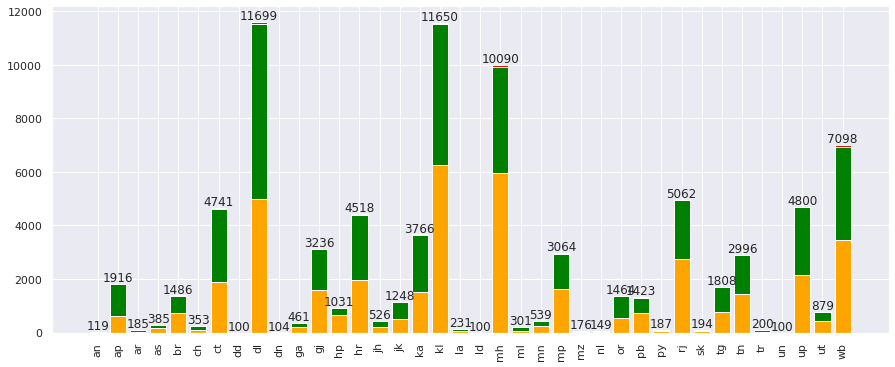

In [19]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.Confirmed, color='orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='red');
plt.xticks(rotation=90);

for i, v in enumerate(df_.index):
  y = df_.loc[v].sum() + 100
  x = i
  plt.text(x, y, str(y), ha="center")

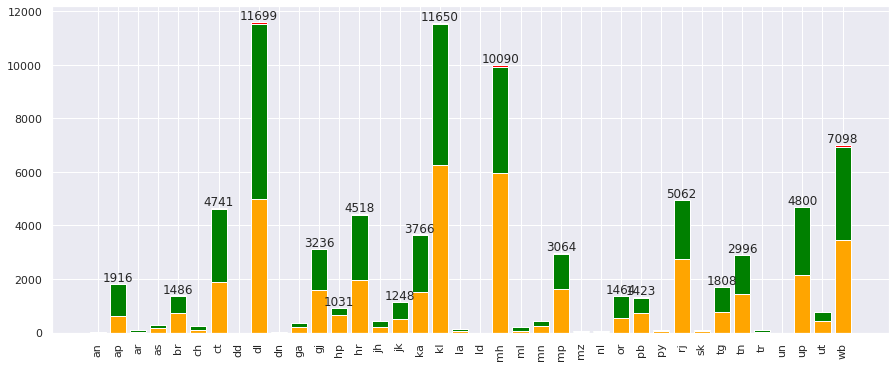

In [20]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.Confirmed, color='orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='red');
plt.xticks(rotation=90);

for i, v in enumerate(df_.index):
  y = df_.loc[v].sum() + 100
  if y > 1000:
    x = i
    plt.text(x, y, str(y), ha="center")

### Relative stacked barplot

In [21]:
df_.head()

status,Confirmed,Recovered,Deceased
an,9,10,0
ap,625,1186,5
ar,31,53,1
as,163,122,0
br,713,668,5


In [22]:
df_['Total'] = 0
df_['Total'] = df_.sum(axis=1)
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,9,10,0,19
ap,625,1186,5,1816
ar,31,53,1,85
as,163,122,0,285
br,713,668,5,1386


In [23]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,9,10,0,19,0.473684,0.526316,0.000000
ap,625,1186,5,1816,0.344163,0.653084,0.002753
ar,31,53,1,85,0.364706,0.623529,0.011765
as,163,122,0,285,0.571930,0.428070,0.000000
br,713,668,5,1386,0.514430,0.481962,0.003608


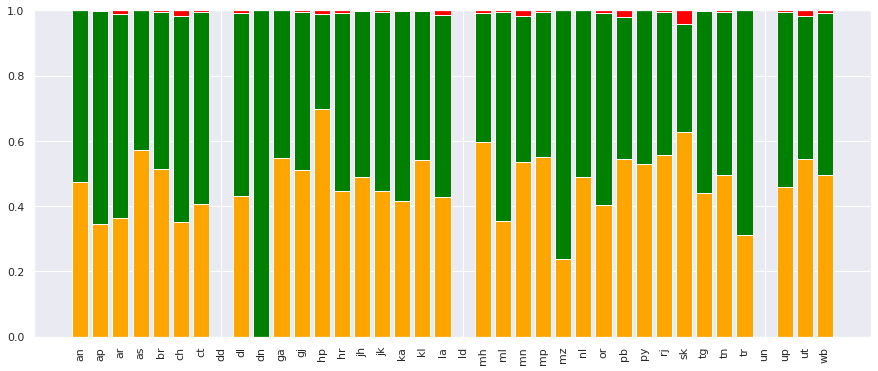

In [24]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.ConfirmedFraction, color='orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='red');
plt.xticks(rotation=90);

In [25]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

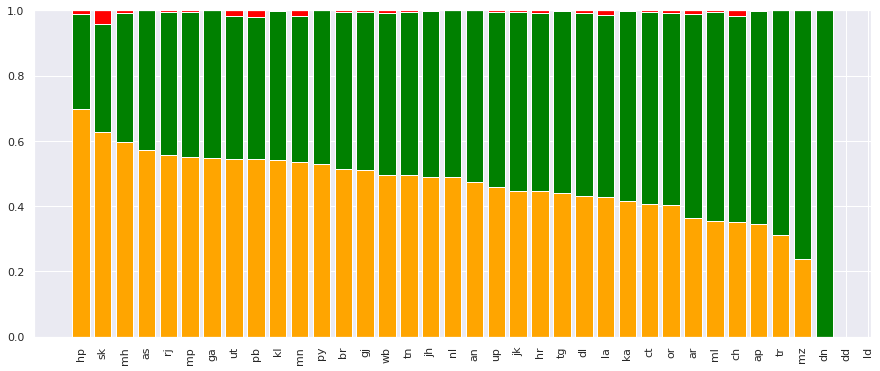

In [26]:
fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.ConfirmedFraction, color='orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='red');
plt.xticks(rotation=90);

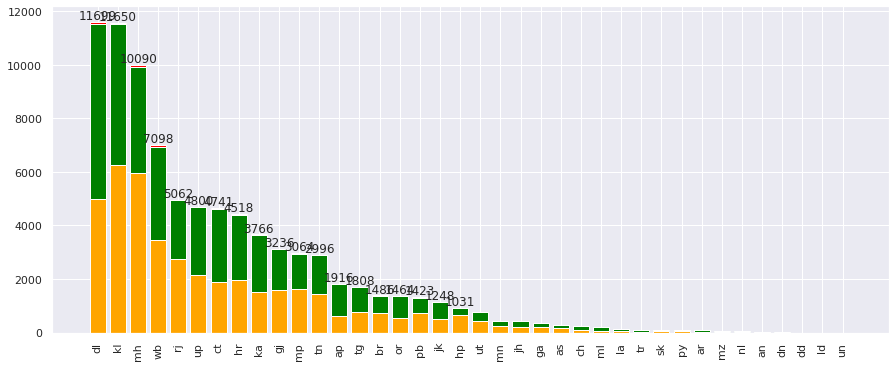

In [27]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.bar(df_.index, df_.Confirmed, color='orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='red');
plt.xticks(rotation=90);

for i, v in enumerate(df_.index):
  y = df_.loc[v, 'Total'] + 100
  if y > 1000:
    x = i
    plt.text(x, y, str(y), ha="center")

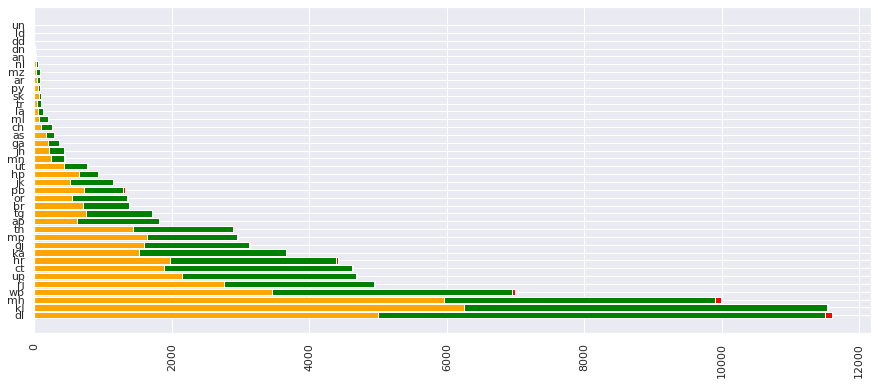

In [28]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6)

plt.barh(df_.index, df_.Confirmed, color='orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='red');
plt.xticks(rotation=90);


## Time-varying composition of data

### Stacked area plots

In [30]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [38]:
df_ = df[['mh', 'date', 'status']]
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [39]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df_.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


date | confirmed | recoverd | deceased

2020-03-14|14|0|0

pivot

In [41]:
df_ = df_.pivot_table(values="mh", columns="status", index="date")
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


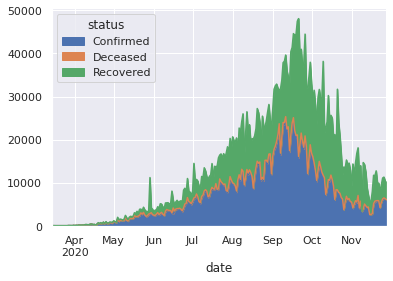

In [44]:
df_.plot.area();

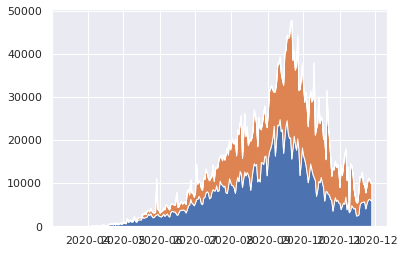

In [47]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

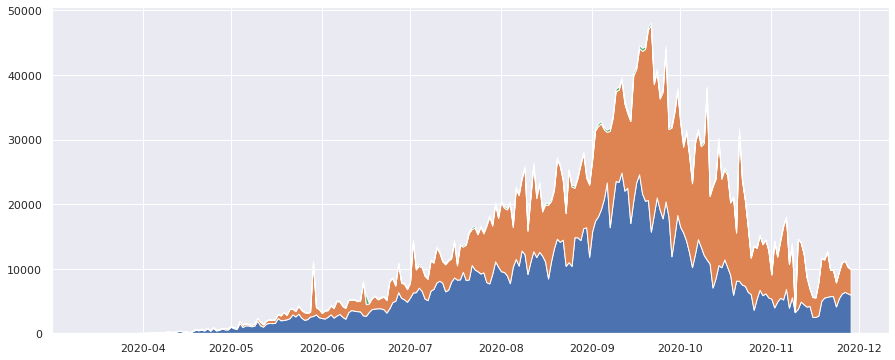

In [48]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

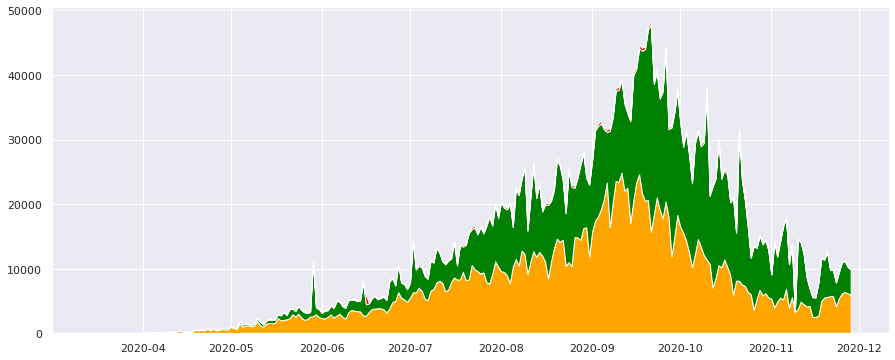

In [49]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors=['orange', 'green', 'red']);

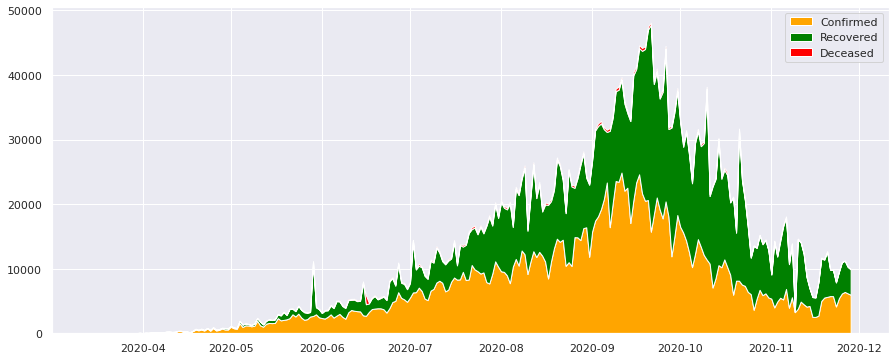

In [52]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

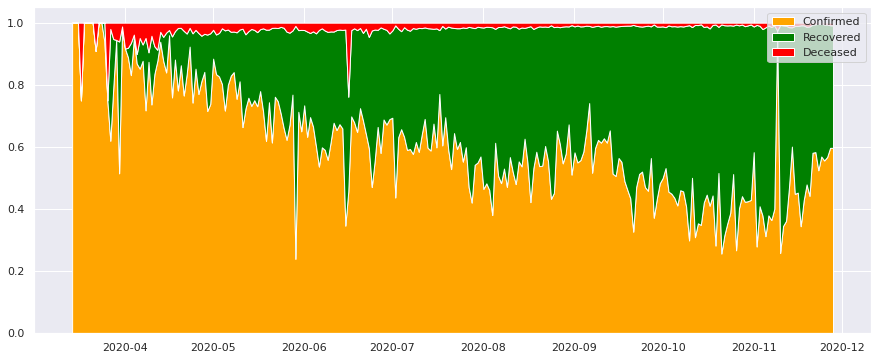

In [53]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

In [56]:
def plot_stacked_area_by_state(state):
  df_ = df[[state, 'date', 'status']]
  df_[state] = pd.to_numeric(df_[state])
  df_['date'] = pd.to_datetime(df_['date']) 
  df_ = df_.pivot_table(values=state, columns="status", index="date")
  fig = plt.gcf();
  fig.set_size_inches(15, 6);
  plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
  plt.legend();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


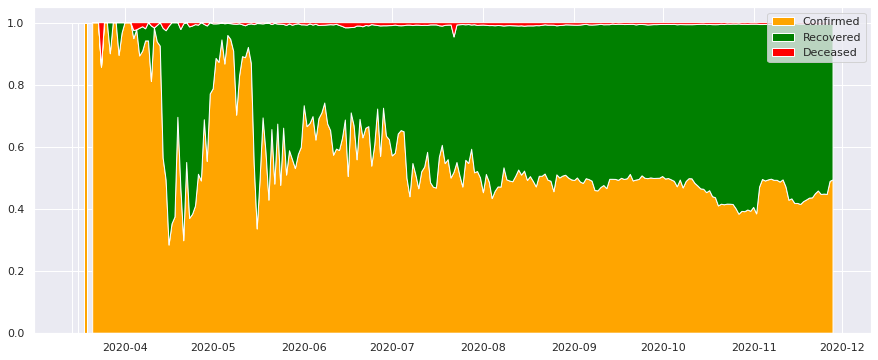

In [57]:
plot_stacked_area_by_state('tn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


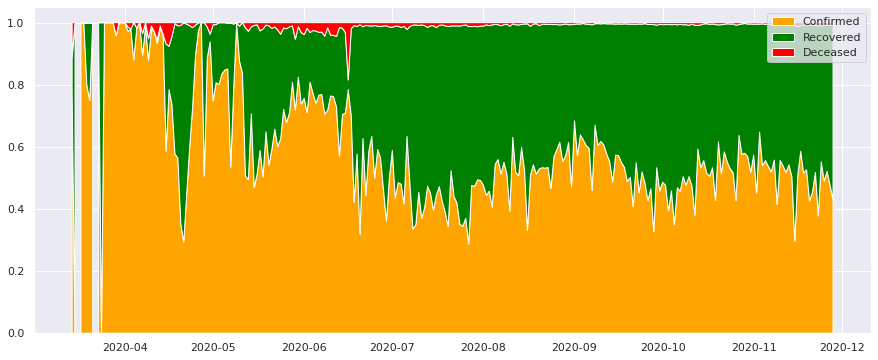

In [58]:
plot_stacked_area_by_state('dl')

## Plotting relationships between data

### Scatter Plot

In [60]:
t = sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


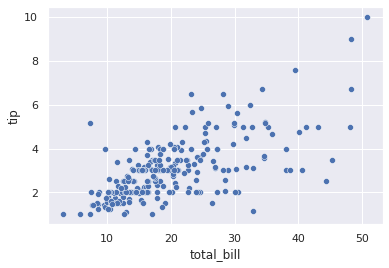

In [62]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [63]:
t['tip_fraction'] = t['tip'] / t['total_bill']

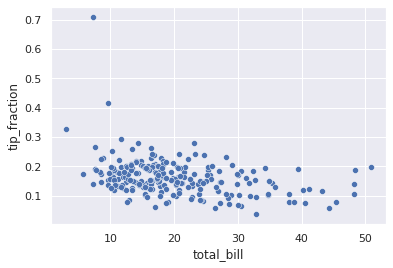

In [64]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t);

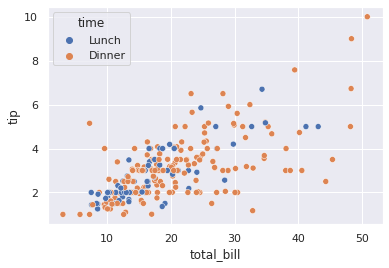

In [66]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time');

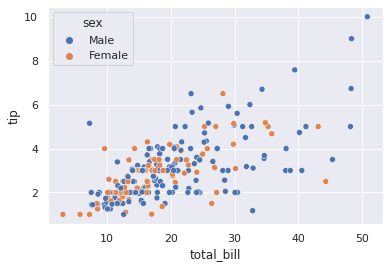

In [67]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='sex');

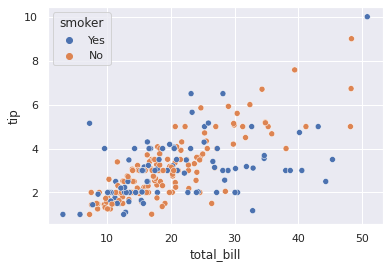

In [68]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='smoker');

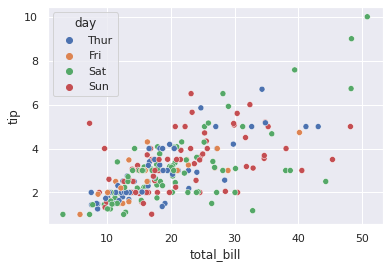

In [69]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='day');

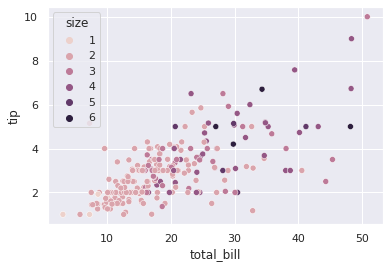

In [70]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='size');

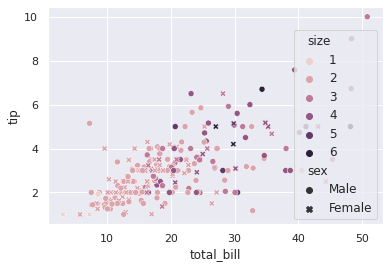

In [71]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='size', style='sex');

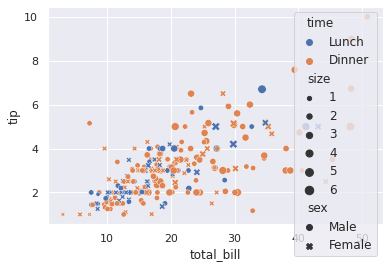

In [72]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex', size='size');

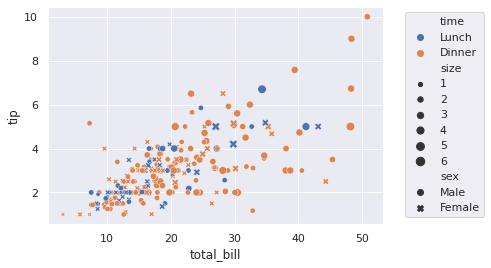

In [74]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05, 1));

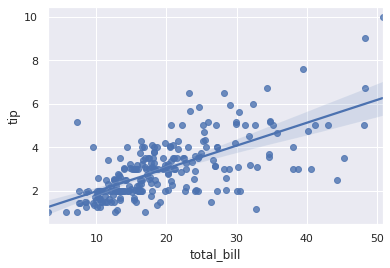

In [77]:
sns.regplot(x='total_bill', y='tip', data=t);

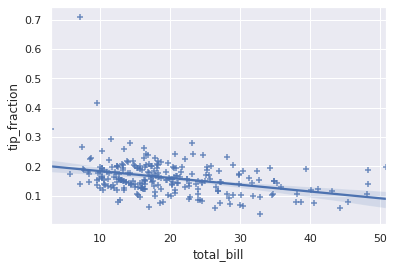

In [79]:
sns.regplot(x='total_bill', y='tip_fraction', data=t, marker='+');

In [81]:
d = sns.load_dataset('diamonds')
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


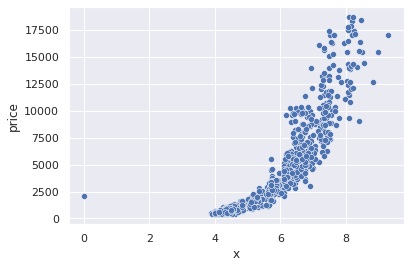

In [84]:
sns.scatterplot('x', 'price', data=d.sample(1000));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


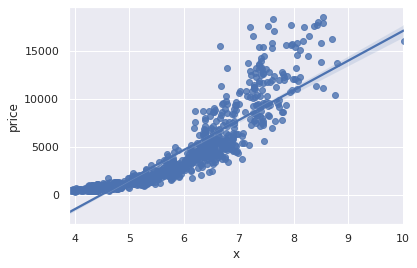

In [85]:
sns.regplot('x', 'price', data=d.sample(1000));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


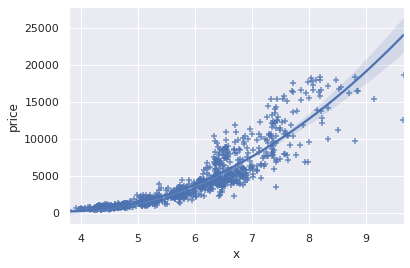

In [88]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker='+');

### Barplots

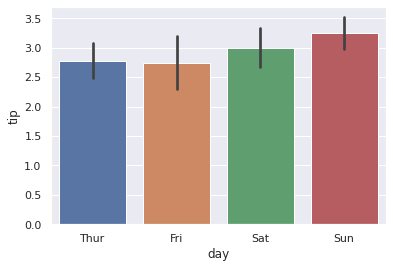

In [90]:
|sns.barplot(x='day', y='tip', data=t);

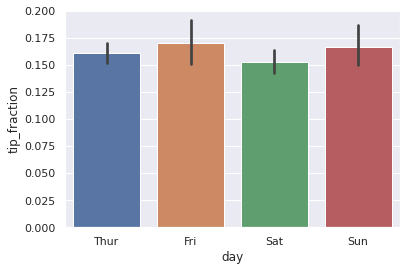

In [91]:
sns.barplot(x='day', y='tip_fraction', data=t);

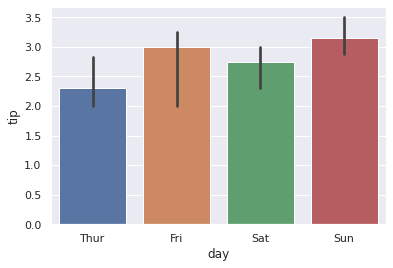

In [92]:
sns.barplot(x='day', y='tip', data=t, estimator=np.median);

In [93]:
def my_estimate(v):
  return np.quantile(v, 0.25)

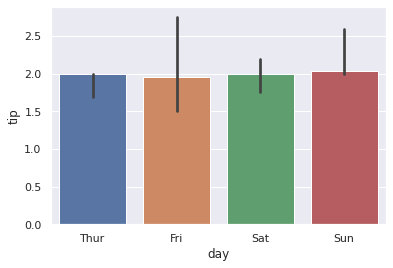

In [94]:
sns.barplot(x='day', y='tip', data=t, estimator=my_estimate);

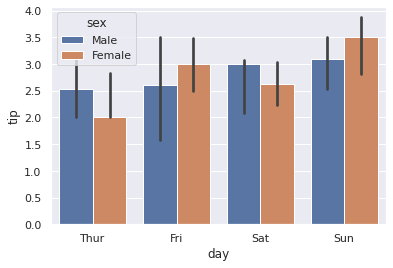

In [96]:
sns.barplot(x='day', y='tip', hue='sex', data=t, estimator=np.median);

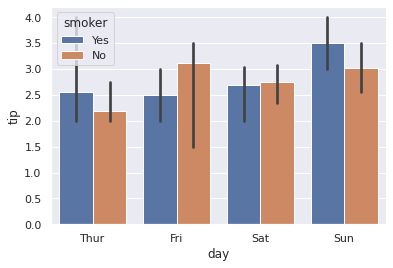

In [97]:
sns.barplot(x='day', y='tip', hue='smoker', data=t, estimator=np.median);

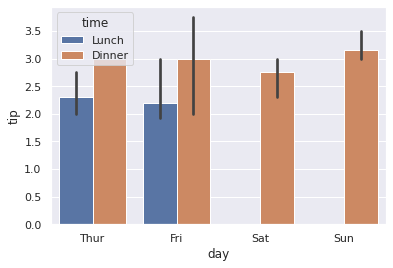

In [98]:
sns.barplot(x='day', y='tip', hue='time', data=t, estimator=np.median);

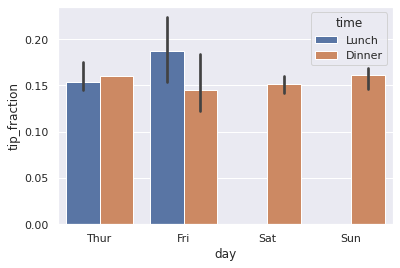

In [100]:
sns.barplot(x='day', y='tip_fraction', hue='time', data=t, estimator=np.median);

In [101]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


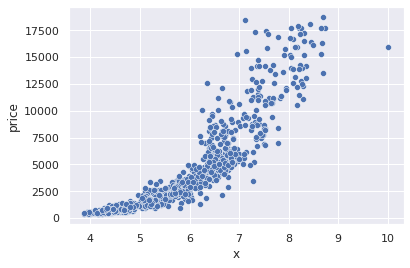

In [105]:
sns.scatterplot('x', 'price', data=d.sample(1000));

In [109]:
d['x_q'] = pd.cut(d['x'], bins=15);
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.58, 4.296]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.58, 4.296]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.58, 4.296]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.58, 4.296]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(4.296, 5.012]"


In [110]:
d['x_q'].unique()

[(3.58, 4.296], (4.296, 5.012], (5.012, 5.728], (6.444, 7.16], (5.728, 6.444], ..., (-0.0107, 0.716], (7.876, 8.592], (8.592, 9.308], (9.308, 10.024], (10.024, 10.74]]
Length: 11
Categories (11, interval[float64]): [(-0.0107, 0.716] < (3.58, 4.296] < (4.296, 5.012] < (5.012, 5.728] <
                                     ... < (7.876, 8.592] < (8.592, 9.308] <
                                     (9.308, 10.024] < (10.024, 10.74]]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


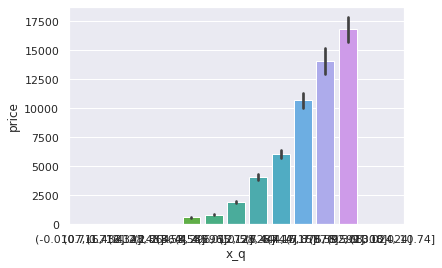

In [111]:
sns.barplot('x_q', 'price', data=d.sample(1000));

In [112]:
# to discreetize continous data
d['x_q'] = pd.cut(d['x'], bins=15, labels=False);
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


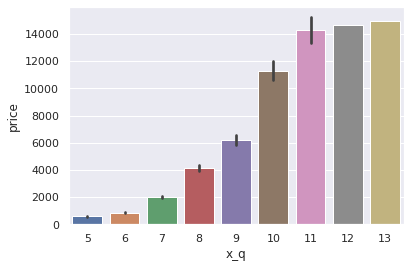

In [113]:
sns.barplot('x_q', 'price', data=d.sample(1000));

### Line plot

In [115]:
f = sns.load_dataset('fmri')
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


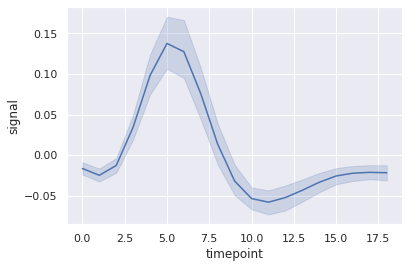

In [117]:
sns.lineplot('timepoint', 'signal', data=f);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


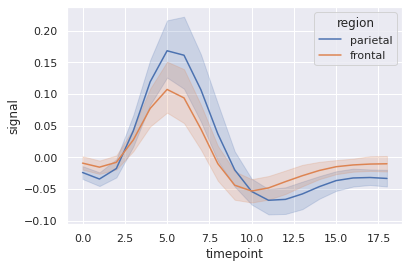

In [118]:
sns.lineplot('timepoint', 'signal', data=f, hue='region');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


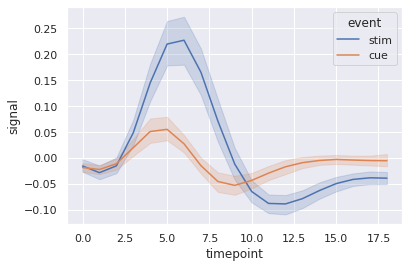

In [119]:
sns.lineplot('timepoint', 'signal', data=f, hue='event');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


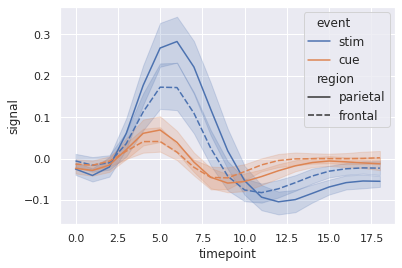

In [120]:
sns.lineplot('timepoint', 'signal', data=f, hue='event', style='region');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


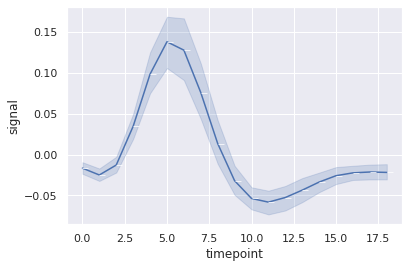

In [122]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


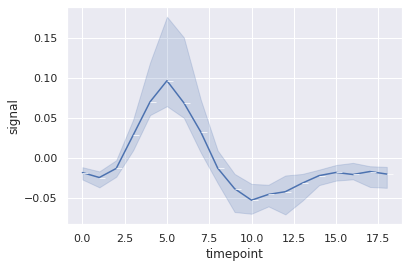

In [123]:
sns.lineplot('timepoint', 'signal', data=f, marker=True, estimator=np.median);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


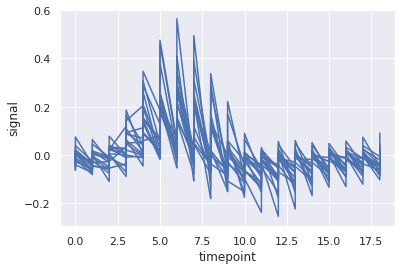

In [125]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [129]:
f_ = f[(f.region == "parietal") & (f.event == "cue")] 
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


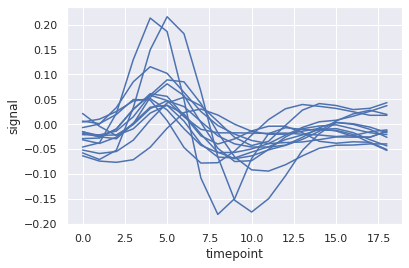

In [130]:
sns.lineplot('timepoint', 'signal', data=f_, units='subject', estimator=None);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


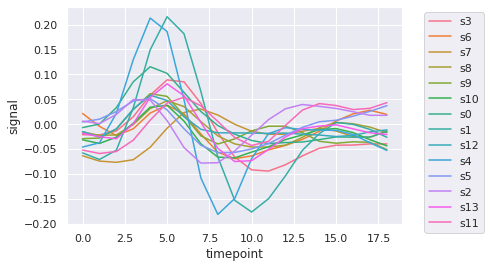

In [132]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);
plt.legend(bbox_to_anchor=(1.05, 1));

In [139]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis=1, inplace=True)
df.drop('dateymd', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace=True)

In [140]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,0,2,1,0


date | state | confirmed

2020-03-14 | an | 0

In [141]:
df_ = pd.melt(df, id_vars="date",
              value_vars=list(df.columns).remove("date"),
              var_name="state", value_name="confirmed")

In [142]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


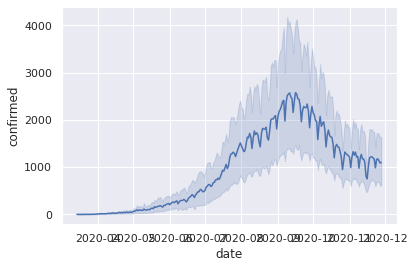

In [143]:
sns.lineplot('date', 'confirmed', data=df_);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


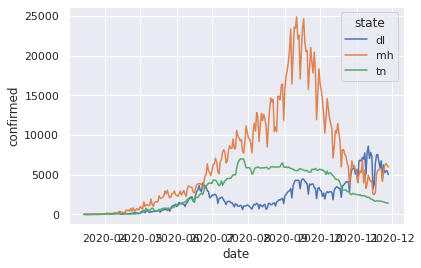

In [148]:
states = ['mh', 'dl', 'tn']
df_ = df_[df_.state.isin(states)]
sns.lineplot('date', 'confirmed', data=df_, hue='state'); 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


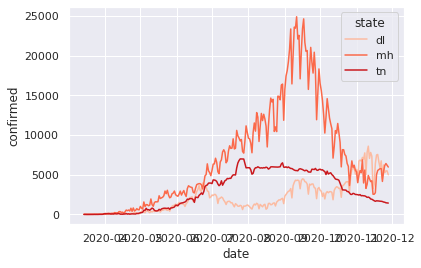

In [149]:
sns.lineplot('date', 'confirmed', data=df_, hue='state', palette="Reds"); 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


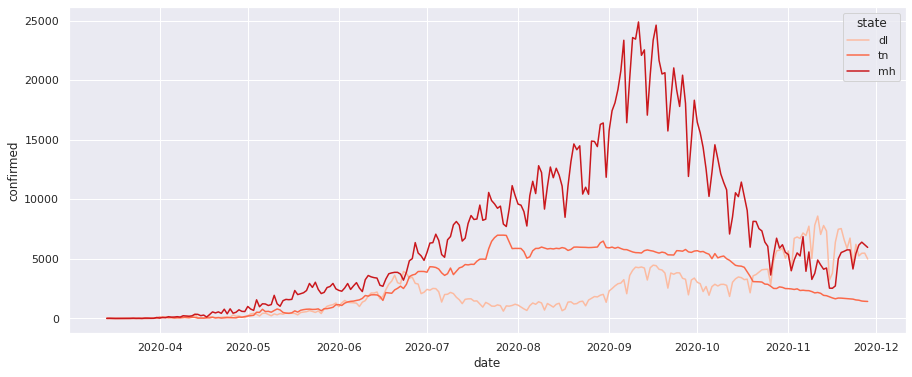

In [152]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('date', 'confirmed', data=df_, hue='state', 
             palette="Reds", hue_order=['dl', 'tn', 'mh']); 

In [153]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('tt', axis=1, inplace=True)
df.drop('dateymd', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean() 
df.reset_index(inplace=True)

In [154]:
df_ = pd.melt(df, id_vars="date",
              value_vars=list(df.columns).remove("date"),
              var_name="state", value_name="confirmed")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


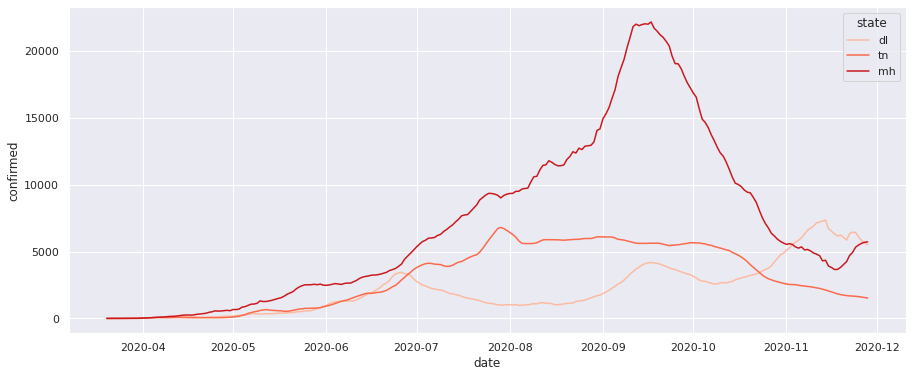

In [155]:
states = ['mh', 'dl', 'tn']
df_ = df_[df_.state.isin(states)]
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('date', 'confirmed', data=df_, hue='state', 
             palette="Reds", hue_order=['dl', 'tn', 'mh']); 

### Heatmaps

In [156]:
x = np.random.rand(10, 10)

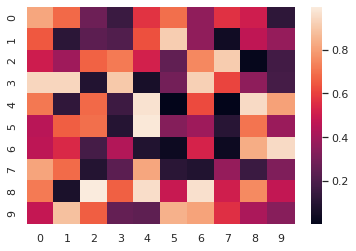

In [158]:
sns.heatmap(x);

In [160]:
fl = sns.load_dataset("flights")
fl.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [163]:
fl_ = fl.pivot(index='year', columns='month', values='passengers');
fl_.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


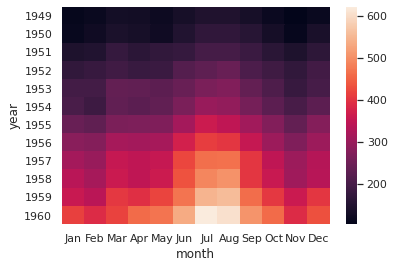

In [165]:
sns.heatmap(fl_);

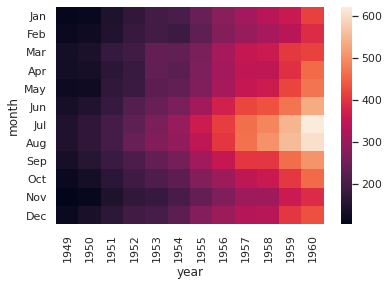

In [166]:
sns.heatmap(fl_.T);

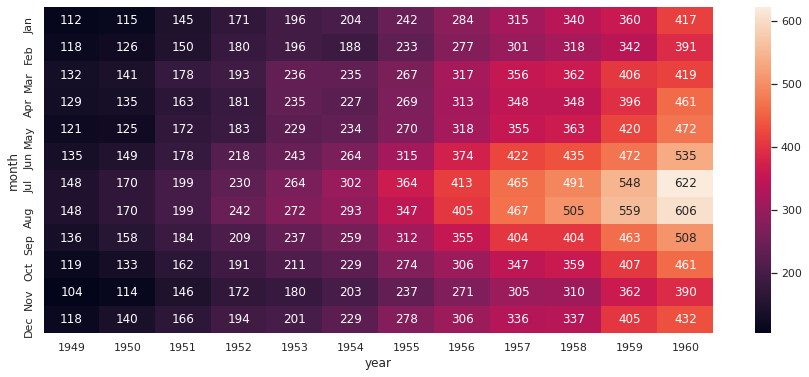

In [168]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d");

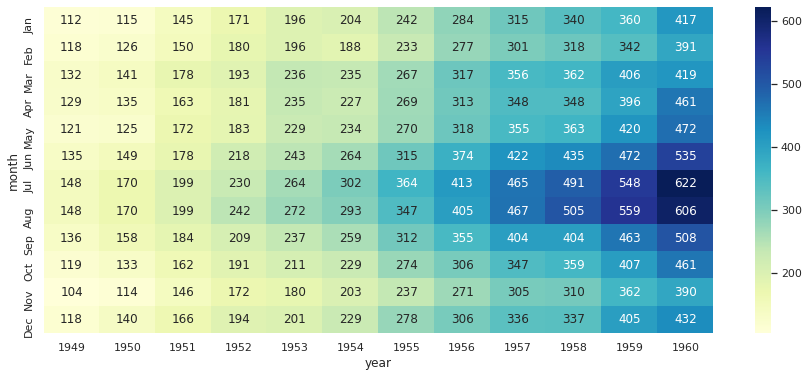

In [169]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", cmap='YlGnBu');

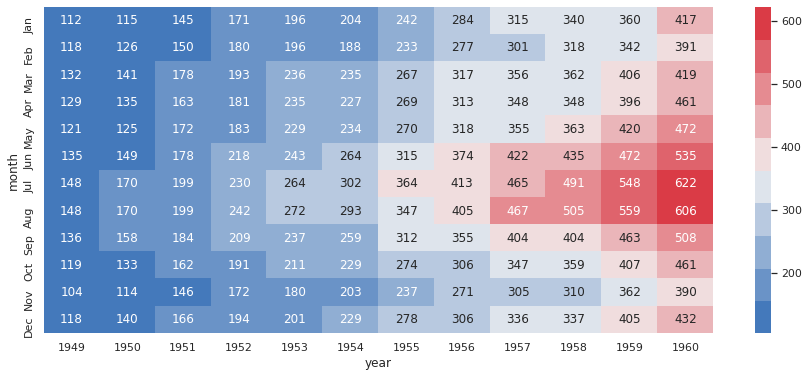

In [170]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(250, 10, n=10));

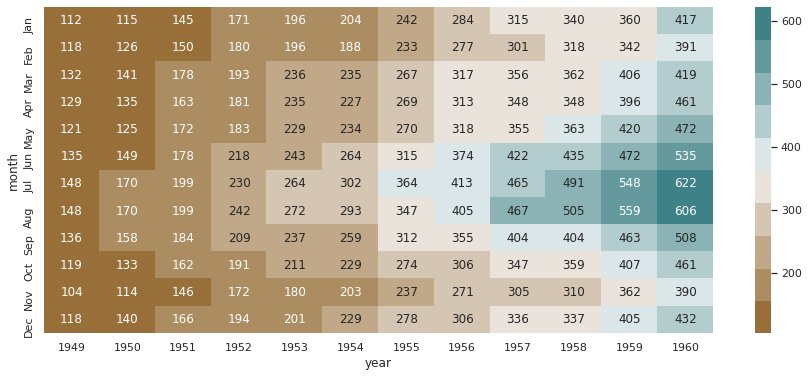

In [171]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=10));

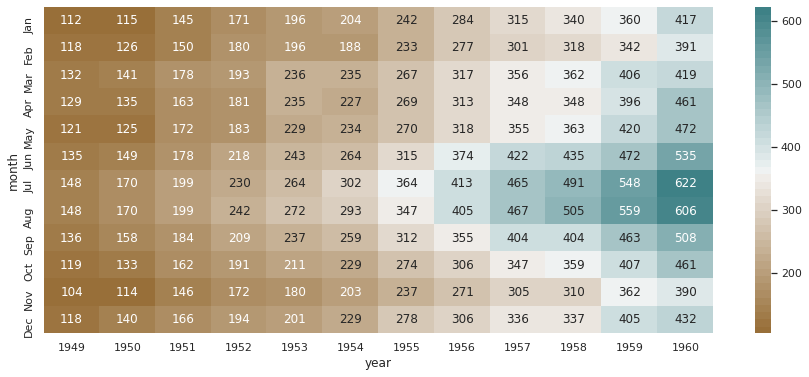

In [172]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=45));

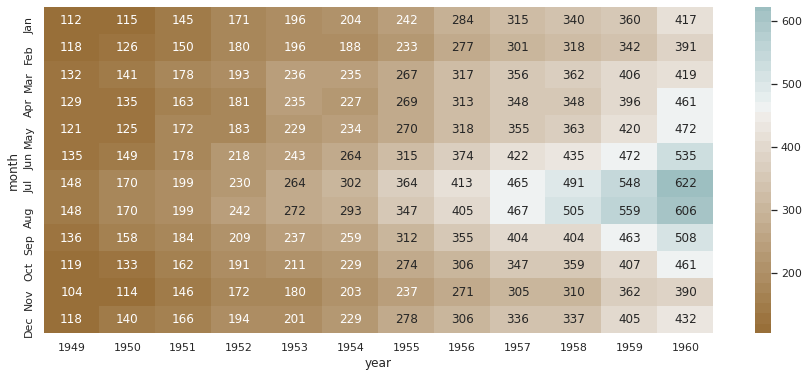

In [176]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=45),
            center=fl_.loc[1957, 'Jul']);

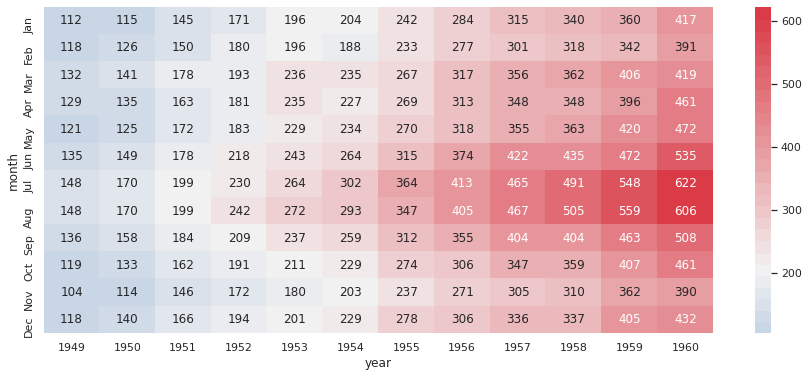

In [178]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.heatmap(fl_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(250, 10, n=45),
            center=fl_.loc[1954, 'Jan']);